In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('regressionOutliers.csv')
data.head()

,X,Y
0,0.655210,-5.1815
1,0.752910,-4.6796
2,0.810860,-3.6935
3,0.048427,-1.2416
4,0.414710,-2.1358


In [4]:
X=data['X']
Y=data['Y']

In [5]:
X=np.array(X)
Y=np.array(Y)

Text(0, 0.5, 'Y')

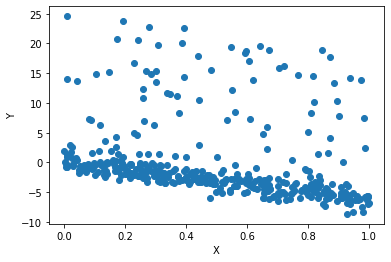

In [6]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

In [73]:

N=200
std=1.5

bananas_width=np.random.normal(4,std,N)
bananas_length=np.random.normal(8,std,N)

apples_width=np.random.normal(6,std,N)
apples_length=np.random.normal(6,std,N)

width=np.concatenate((bananas_width,apples_width))
length=np.concatenate((bananas_length,apples_length))

X=np.array([width,length]).T

bananas_label=np.zeros(N, dtype='int')
apples_label=np.ones(N, dtype='int')

Y=np.concatenate((bananas_label,apples_label))

Text(0, 0.5, 'Length')

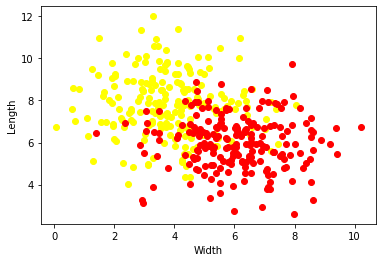

In [74]:
#bananas
plt.scatter(X[0:N,0],X[0:N,1],c='yellow')

#apples
plt.scatter(X[N:,0],X[N:,1],c='red')
plt.xlabel('Width')
plt.ylabel('Length')


In [75]:
class KnearestNeighbors:
   
    def __init__(self,k):
        self.k=k
        
    #train    
    def fit(self,X_train,y_train):
        
        self.X_train=X_train
        self.y_train=y_train
        
        #to know the count of classes
        self.number_of_classes=len(np.unique(y_train))
        
    #test    
    
    def nearNeighbors(self,x_test):
        
    
        distance=np.sqrt(np.sum((x_test-self.X_train)**2,axis=1))
        near_neighbors=np.argsort(distance)[0:self.k]
        return near_neighbors
        
    def predict(self,x_test):
        
        near_neighbors=self.nearNeighbors(x_test)
        y_pred=np.argmax(np.bincount(self.y_train[near_neighbors]))
        
        #0=banana
        #1=apple
        return y_pred
    
    def evaluate(self,X_test,y_test):
        num_of_correct_pred=0
        self.X_test=X_test
        self.y_test=y_test
        y=[]
        
        for i in range(len(X_test)):
            y.append(self.predict(X_test[i]))

        for i in range(len(y)):
            if(y_test[i]==y[i]):
                num_of_correct_pred=num_of_correct_pred+1
        return accuracy
        
                
            
        
            

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [80]:
knn=KnearestNeighbors(5)
knn.fit(X_train,y_train)
accuracy=knn.evaluate(X_test,y_test)

print("The accuracy of the model:",accuracy)






The accuracy of the model: 82.5


In [79]:
#knn in scikitlean
import sklearn
from sklearn.neighbors import KNeighborsClassifier

label=0

KNN=KNeighborsClassifier(5)
KNN.fit(X,Y)
y=KNN.predict(X_test)
for i in range(len(y_pred)):
    if (y[i]==y_test[i]):
        label=label+1
        
accuracy=(label/len(y_test))*100

print("The accuracy of sklearn :",accuracy)
        
        
        

            

The accuracy of sklearn : 82.5
